# Практическая работа №1: Краевая задача для уравнения II-го порядка.

Выполнил студент гр. 9382 Субботин Максим, вариант 36.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения
### Задача Коши
Система n ОДУ первого порядка:
$
\begin{cases}
    y'_1=f_1(x,y_1,...,y_n) \\
    \dots \\
    y'_n=f_n(x,y_1,...,y_n) \\
    y_1(x_0)=y_{01} \\
    \dots \\
    y_n(x_0)=y_{0n} \\
\end{cases}
$

ОДУ n-го порядка:
$
\begin{cases}
    y^{(n)}=f(x,y,...,y^{(n-1)}) \\
    y(x_0)=y_{01} \\
    \dots \\
    y^{(n-1)}(x_0)=y_{0n} \\
\end{cases}
$

Решение задачи Коши состоит в нахождении решения (интеграла) дифференциального уравнения, удовлетворяющим начальным условиям.

### Краевая задача 
Задача о нахождении решения заданного дифференциального уравнения удовлетворяющего краевым условиям в концах интервала.


### Метод половинного деления
Метод заключается в нахождении корней нелинейного уравнения.
Задается отрезок $[x_n,x_k]$, до тех пор, пока результат не будет достаточно точным находится середина этого отрезка и от середины находится значение функции $f(x_{mid})$, если это значение имеет другой знак, по сравнению с $f(x_n)$, либо превышает значение f, которое мы хотим уточнить, то $x_k = f(x_{mid})$, иначе $x_n = f(x_{mid})$. Такими шагами по половине отрезка мы уточним нуль (либо искомое значение) нашей функции.

## Постановка задачи

Дано дифференциальное уравнение:
$y''=f(x,y), a < x < b$ $\space\space\space(1)$

и граничные условия

$y(a) = y_a, y(b) = y_b$    $\space\space\space(2)$

Требуется найти решение задачи (1)-(2) и построить его график.

Рассмотрим задачу Коши для уравнения (1) с начальными условиями 

$y(a) = y_a, y'(a) = h$     $\space\space\space(3)$

План решения основан на многократном решении задачи Коши (1),(3).

Задача сводится к нахождению такого значения переменной h, при которой выполнено условие на правом конце отрезка, т.е. должно выполняться

$y(b,h) = y_b$





## Выполнение работы

Имеем дифференциальное уравнение:

$y'' = 2^x/(x+y)$

Краевые значения:

$y(0) = 1$

$y(2) = 2$



Приведем к задаче Коши:

$
\begin{cases}
    y''=f(x,y) \\
    y(0)=1 \\
    y'(0)=h \\
\end{cases}
$

Python, насколько мне известно, не умеет решать задачу Коши второго порядка, за то он умеет решать систему двух ОДУ первого порядка:

$
\begin{cases}
    y_1'=y_2 \\
    y_1(0) = 1 \\
    y_2' = 2^x/(x+y) \\
    y_2(0) = h \\
\end{cases}
$

При h =  -3.2  f(2) =  2.079664013813239


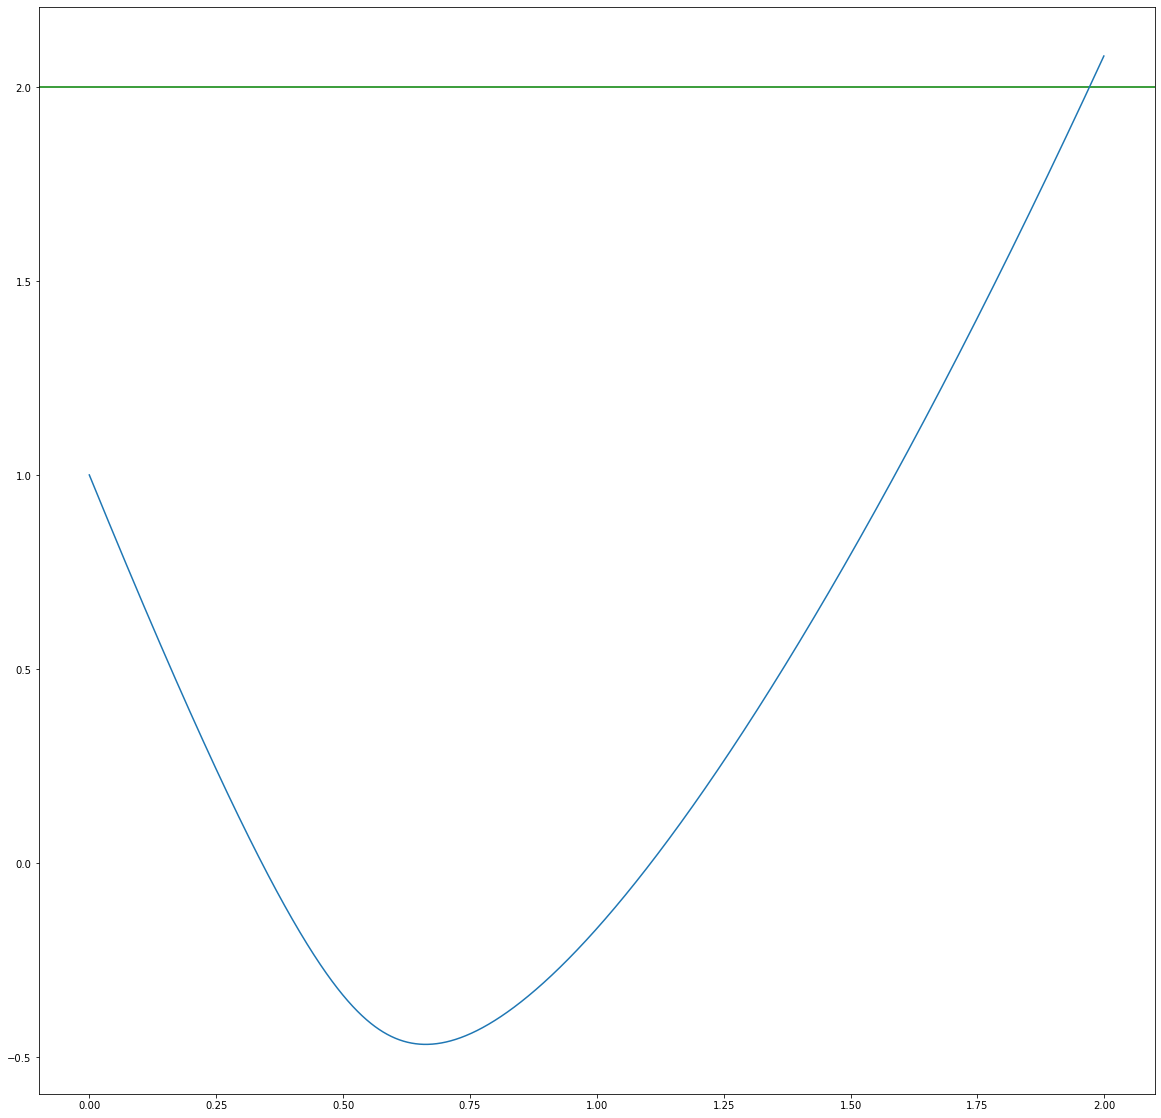

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
def f(Y,t):
    return [Y[1], np.power(2,t)/(t+Y[0])]
h = -3.2
a_t = np.arange(0, 2, 0.001)
sol = odeint(f, [1,h], a_t)
sol_upper = sol
plt.axhline(y=2, color='green', linestyle='-')
plt.rcParams["figure.figsize"] = (20,20)
plt.plot(a_t, sol[:,0])
print("При h = ", h, " f(2) = ", sol[-1,0])

Выбрали $h=-3.2$, получили приближение на конце отрезка сверху.

Теперь найдем приближение снизу, будем идти с шагом 0.01, до тех пор, пока значение функции не будет меньше 3.

Для концов отрезка h: [ -3.1500000000000012 , -3.2 ] значения функции f равны: [ 1.9845437130485961 , 2.079664013813239 ]


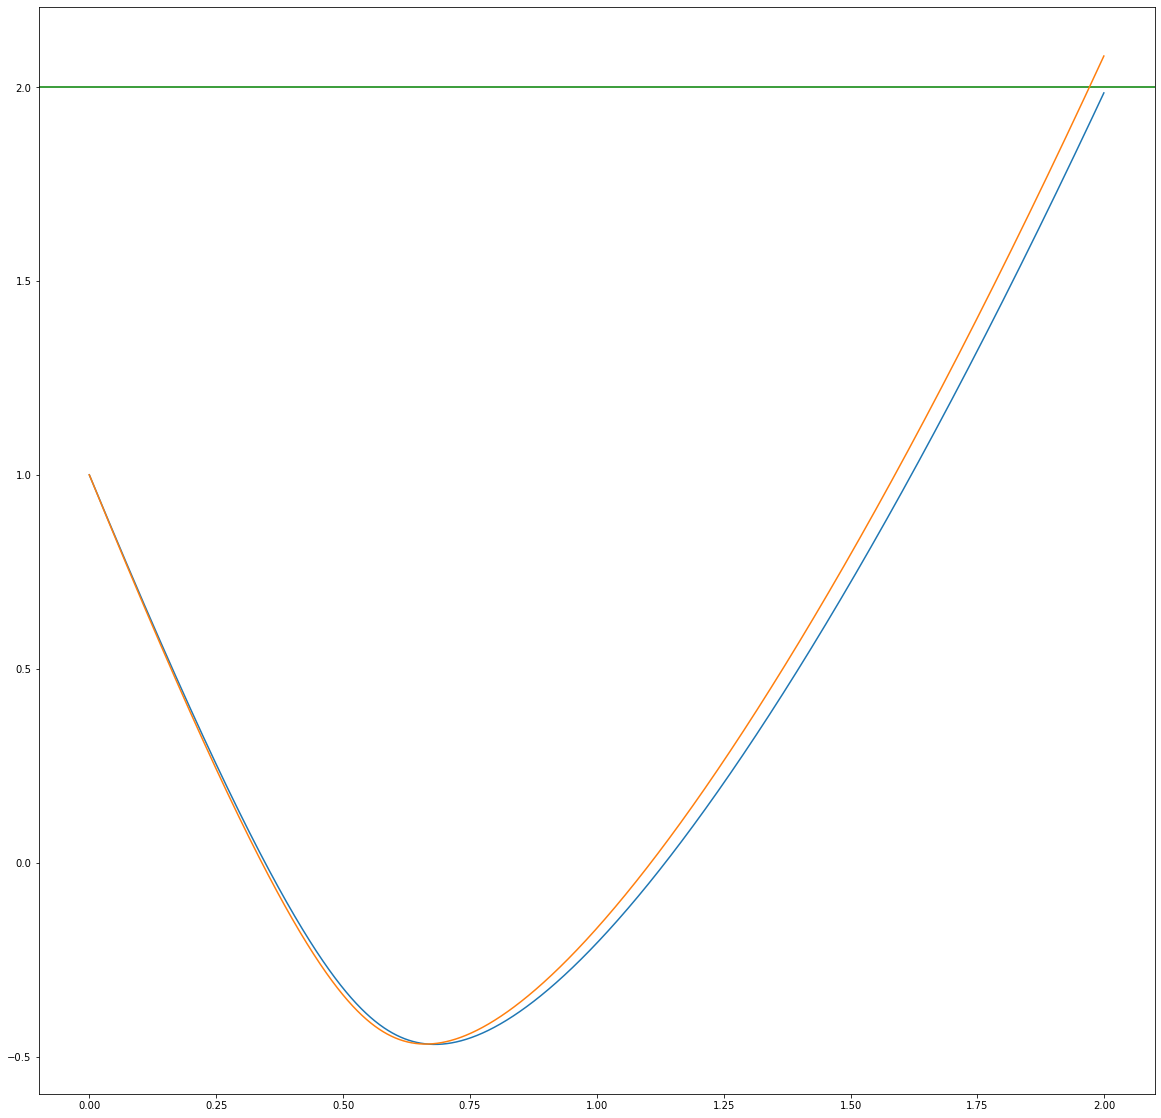

In [6]:
upper_h = h
upper_y = sol[-1,0]
last_y = sol[-1,0]
dh = 0.01
while last_y > 2:
    h = h + dh
    sol = odeint(f, [1,h], a_t)
    last_y = sol[-1,0]
sol_lower = sol
lower_h = h
lower_y = sol[-1,0]
print("Для концов отрезка h: [",lower_h,",",upper_h,"]", "значения функции f равны: [",lower_y,",", upper_y,"]")
plt.axhline(y=2, color='green', linestyle='-')
plt.plot(a_t, sol_lower[:,0])
plt.plot(a_t, sol_upper[:,0])

Методом половинного деления приблизим h, чтобы отрезок по y был меньше 0.001.

Границы h:[ -3.158203125000001 , -3.1585937500000005 ]   соответствующие значения функции f:[ 1.9999943051576932 , 2.0007315147739306 ]
Решением задачи будут значения на розовом графике при h= -3.158203125000001


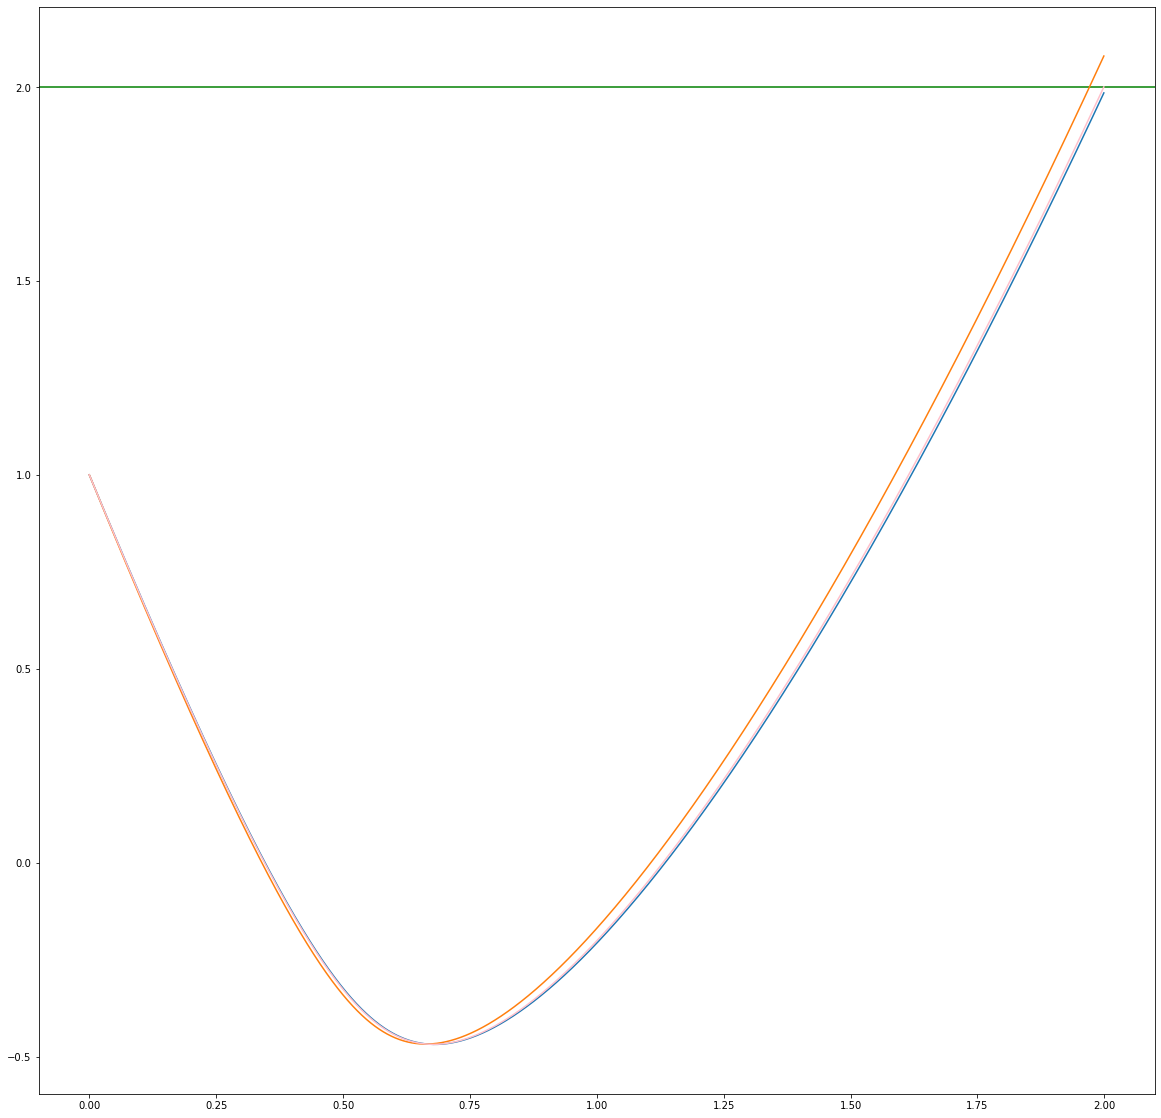

In [7]:
steps = 0
mid = 0
while abs(upper_y - lower_y) >= 0.001:
    steps += 1
    dh = (upper_h - lower_h)/2
    h_mid = lower_h + dh
    mid = odeint(f, [1,h_mid], a_t)
    if(mid[-1,0] > 2):
        upper_h = h_mid
        upper_y = mid[-1,0]
    else:
        lower_h = h_mid
        lower_y = mid[-1,0]

print("Границы h:[",lower_h,",",upper_h,"] ", " соответствующие значения функции f:[",lower_y,",",upper_y,"]")
print("Решением задачи будут значения на розовом графике при h=",h_mid)
plt.axhline(y=2, color='green', linestyle='-')
plt.plot(a_t, sol_lower[:,0])
plt.plot(a_t, sol_upper[:,0])
plt.plot(a_t, mid[:,0], color="pink")

## Выводы

Была решена краевая задача для уравнения второго порядка путем многократного решения задачи Коши. Сначала ОДУ второго порядка было сведено к системе из двух ОДУ первого порядка. Решена задача Коши при двух значений h, для которых значение на концевой точке $y(2)=2$ попадало в интервал $[y_{h_1}(2),y_{h_2}(2)]$. Затем методом половинного деления значение h было уточнено.